In [1]:
# import required libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the csv files into a dataframe
user_df = pd.read_csv("takehome_users.csv", parse_dates=['creation_time'], encoding = "ISO-8859-1")
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


## Import datasets into dataframes

In [3]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


#### In the user files, the columns last_session_creation_time and invited_by_user_id have some missing values.

In [4]:
eng_df = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])
eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


#### In the user engagement file, there are no columns with missing values.

## Data Wrangling

In [6]:
# convert the date columns to datetime format and sort the values in ascending order
user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'],unit='s')

#logins = logins.sort_values('login_time')
user_df.set_index('object_id', inplace=True)
user_df.index_name = 'user_id'


In [7]:
user_df['adopted_user']=0
user_df['was_invited'] = user_df.invited_by_user_id.apply(lambda x:0 if np.isnan(x) else 1)
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null int64
was_invited                   12000 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 1.1+ MB


#### From the above, we can see that the avg_rating_by_driver, avg_rating_of_driver and phone columns seems to have some missing values

In [8]:
# compute values for adopted_user
eng_df = eng_df.sort_values(['user_id','time_stamp'])
for idx in eng_df.index[:-2]:
    if eng_df.loc[idx, 'user_id'] == eng_df.loc[idx+2,'user_id']:
        if (eng_df.loc[idx+2, 'time_stamp'] - eng_df.loc[idx,'time_stamp']).days <= 7 :
            user_id = eng_df.loc[idx, 'user_id']
            user_df.loc[user_id,'adopted_user']=1
user_df.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,was_invited
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0,1
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0,0
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0,0
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0,0


In [9]:
user_df.adopted_user.value_counts()

0    10344
1     1656
Name: adopted_user, dtype: int64

## Exploratory Data Analysis

In [10]:
user_df.corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,was_invited
opted_in_to_mailing_list,1.000000,0.483529,0.003432,0.004699,0.008838,0.006934
enabled_for_marketing_drip,0.483529,1.000000,0.009275,0.003687,0.006578,0.002216
org_id,0.003432,0.009275,1.000000,-0.057780,0.066995,-0.018442
invited_by_user_id,0.004699,0.003687,-0.057780,1.000000,0.001185,NaN
adopted_user,0.008838,0.006578,0.066995,0.001185,1.000000,0.027831
was_invited,0.006934,0.002216,-0.018442,NaN,0.027831,1.000000


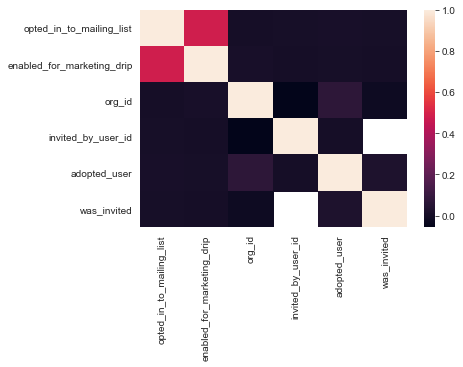

In [11]:
# plot the correlation between all numeric columns
sns.heatmap(user_df.corr())

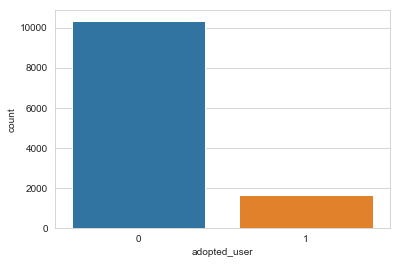

In [12]:
# plot the count of adopter_user values
sns.countplot(x="adopted_user",data=user_df)

Text(0, 0.5, 'Count')

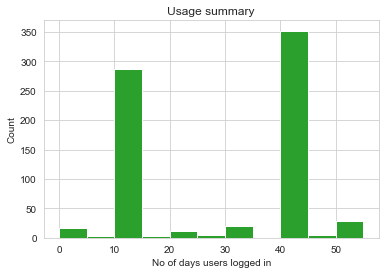

In [13]:
# plot a histogram to show counts of user logins into the product
eng_df['user_id'].plot(kind='hist',bins=np.arange(0,60,5),color='C2',title='Usage summary')
plt.xlabel('No of days users logged in')
plt.ylabel('Count')

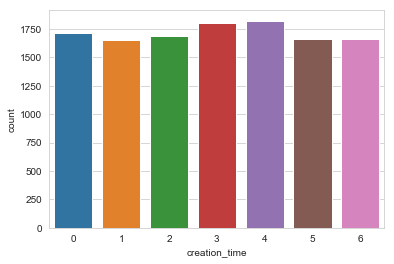

In [14]:
# plot the count by DOW of creation date
sns.countplot(x=user_df['creation_time'].dt.dayofweek,data=user_df)

## Machine Learning Modeling

In [15]:
# create a new feature
num_visits = eng_df.groupby('user_id').visited.count()
num_visits.name = 'number_visits'
user_df2 = user_df.join(num_visits, how='left')
user_df2.number_visits = user_df2.number_visits.fillna(0).astype('int')

In [16]:
user_df2.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,was_invited,number_visits
object_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1,1
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,1,14
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,1
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1,1


In [17]:
# import utilities for modeling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor

In [18]:
# identify independent features X and target variable y
user_df2['adopted_user'] = user_df2['adopted_user'].astype('category')
user_df2['was_invited'] = user_df2['was_invited'].astype('category')

user_df2['opted_in_to_mailing_list'] = user_df2['opted_in_to_mailing_list'].astype('category')
user_df2['enabled_for_marketing_drip'] = user_df2['enabled_for_marketing_drip'].astype('category')

In [19]:
# identify independent features X and target variable y

target = "adopted_user"

X = user_df2.drop(["creation_time","name","email","last_session_creation_time","invited_by_user_id","adopted_user"],axis=1) 
y = user_df2[target] 

X = pd.get_dummies(X, drop_first=True)
X.head()

,org_id,number_visits,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_1,enabled_for_marketing_drip_1,was_invited_1
object_id,,,,,,,,,
1,11,1,0,0,0,0,1,0,1
2,1,14,1,0,0,0,0,0,1
3,94,1,1,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,1
5,193,1,0,0,0,0,0,0,1


In [20]:
# split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=30, stratify=y, test_size=0.30)

In [21]:
# Apply the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print("RandomForestClassifier Accuracy = ",metrics.accuracy_score(y_test, predictions))
print("Classification Report:\n", metrics.classification_report(y_test, predictions))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, predictions))

RandomForestClassifier Accuracy =  0.9863888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3103
           1       0.97      0.93      0.95       497

   micro avg       0.99      0.99      0.99      3600
   macro avg       0.98      0.96      0.97      3600
weighted avg       0.99      0.99      0.99      3600

Confusion Matrix:
 [[3088   15]
 [  34  463]]


In [22]:
# Apply the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)

print("GradientBoostingClassifier Accuracy = ",metrics.accuracy_score(y_test, predictions))
print("Classification Report:\n", metrics.classification_report(y_test, predictions))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, predictions))

GradientBoostingClassifier Accuracy =  0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3103
           1       0.97      0.93      0.95       497

   micro avg       0.99      0.99      0.99      3600
   macro avg       0.98      0.96      0.97      3600
weighted avg       0.99      0.99      0.99      3600

Confusion Matrix:
 [[3087   16]
 [  34  463]]


In [23]:
# Apply the Logistic Regression
lgr = LogisticRegression(random_state=1)
lgr.fit(X_train, y_train)
predictions = lgr.predict(X_test)

print("LogisticRegression Accuracy = ",metrics.accuracy_score(y_test, predictions))
print("Classification Report:\n", metrics.classification_report(y_test, predictions))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, predictions))

LogisticRegression Accuracy =  0.9852777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3103
           1       0.97      0.92      0.95       497

   micro avg       0.99      0.99      0.99      3600
   macro avg       0.98      0.96      0.97      3600
weighted avg       0.99      0.99      0.99      3600

Confusion Matrix:
 [[3089   14]
 [  39  458]]


#### So it is evident from the above modeling methods that Random Forest classifier and Gradient Boosting classifier will give the best performance and accuracy

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished


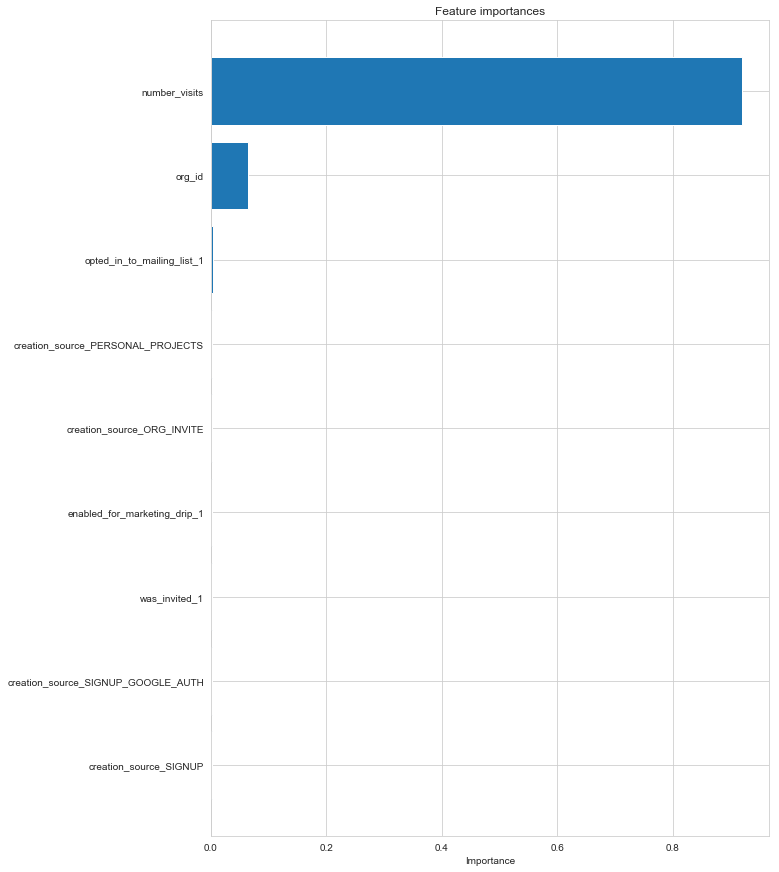

In [24]:
RF = RandomForestRegressor(verbose=True, n_estimators=500, max_features='sqrt')
RF.fit(X, y)

features_list = X.columns.values
feature_importance = RF.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(10,15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()